# Import Important Libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Import Dataset

In [92]:
df = pd.read_csv("diabetes.csv")
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Understanding the Dataset 

In [93]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [94]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [95]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

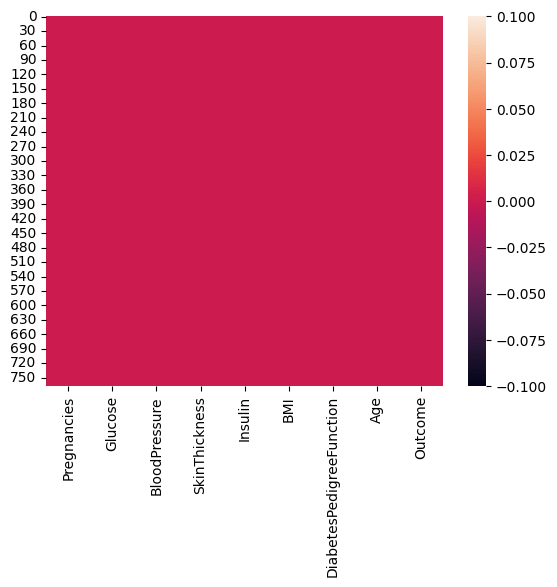

In [96]:
sns.heatmap(df.isnull())


# Data Visualization and Preprocessing

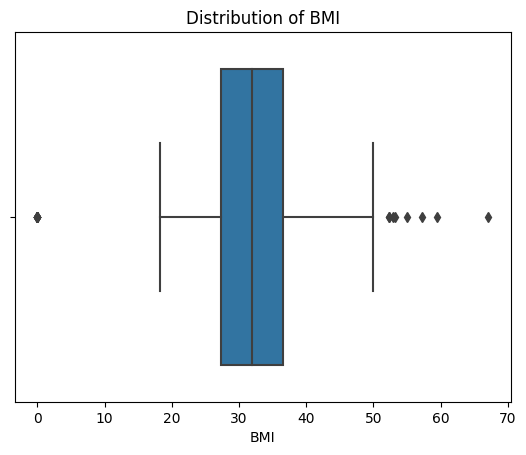

In [97]:
sns.boxplot(x='BMI', data=df)
plt.xlabel('BMI')
plt.title('Distribution of BMI')
plt.show()


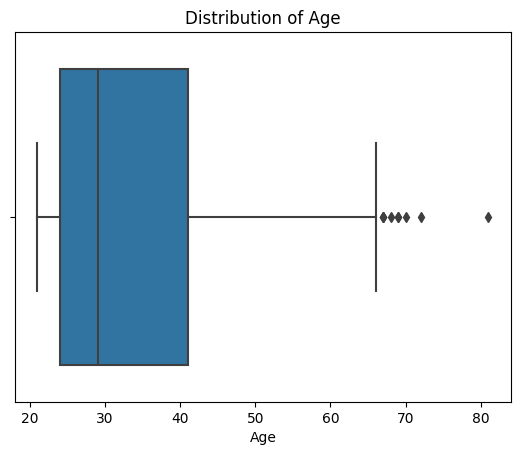

In [98]:
sns.boxplot(x='Age', data=df)
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.show()


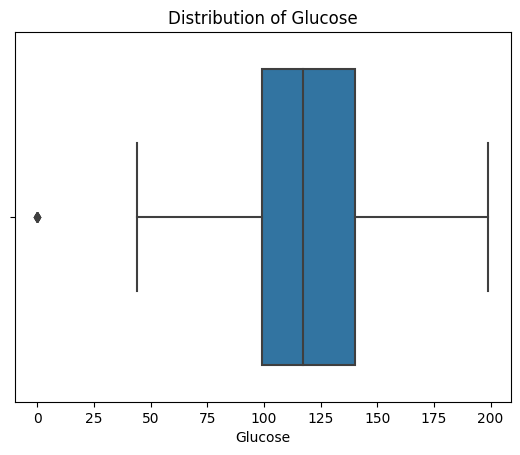

In [99]:
sns.boxplot(x='Glucose', data=df)
plt.xlabel('Glucose')
plt.title('Distribution of Glucose')
plt.show()


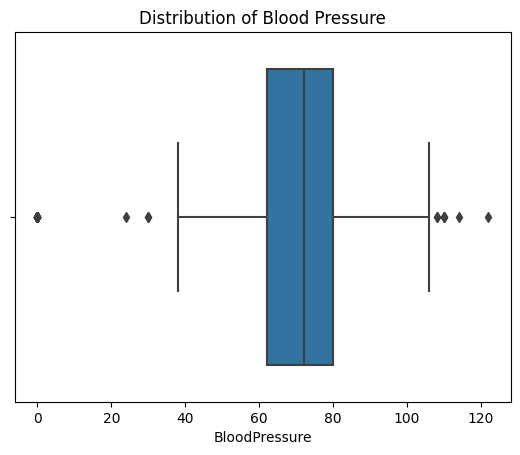

In [100]:
sns.boxplot(x='BloodPressure', data=df)
plt.xlabel('BloodPressure')
plt.title('Distribution of Blood Pressure')
plt.show()


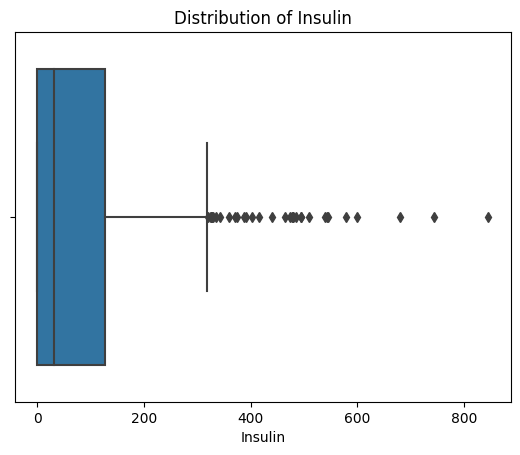

In [101]:
sns.boxplot(x='Insulin', data=df)
plt.xlabel('Insulin')
plt.title('Distribution of Insulin')
plt.show()


In [102]:
# Outliers Handling
q1 = df["BMI"].quantile(0.25)
q3 = df["BMI"].quantile(0.75)
iqr = q3 - q1

# define the upper and lower bounds for outlier detection
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# remove outliers from the dataset
df2 = df[df['BMI'] < upper_bound]
df2 = df2[df2['BMI'] > lower_bound]
df2


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [103]:
# Outliers Handling
q1 = df["BMI"].quantile(0.25)
q3 = df["BMI"].quantile(0.75)
iqr = q3 - q1

# define the upper and lower bounds for outlier detection
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# remove outliers from the dataset
df2 = df[df['BMI'] < upper_bound]
df2 = df2[df2['BMI'] > lower_bound]
df2


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


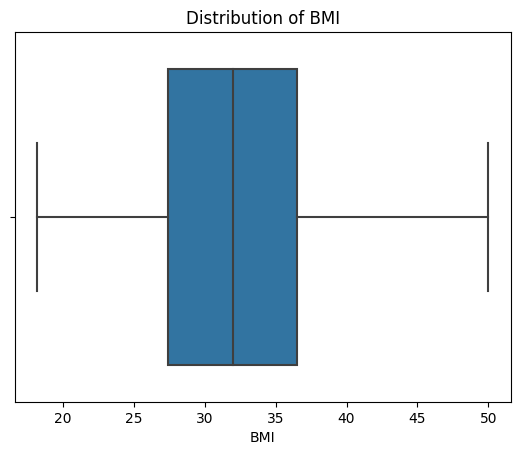

In [104]:
# Boxplots after outliers Removal with very few outlier values
sns.boxplot(x='BMI', data=df2)
plt.xlabel('BMI')
plt.title('Distribution of BMI')
plt.show()


In [105]:
# Outliers Handling
q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)
iqr = q3 - q1

# define the upper and lower bounds for outlier detection
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# remove outliers from the dataset
df2 = df2[df2['Age'] < upper_bound]
df2 = df2[df2['Age'] > lower_bound]
df2


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


[Text(0.5, 1.0, 'Distribution of Number of Age'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Count')]

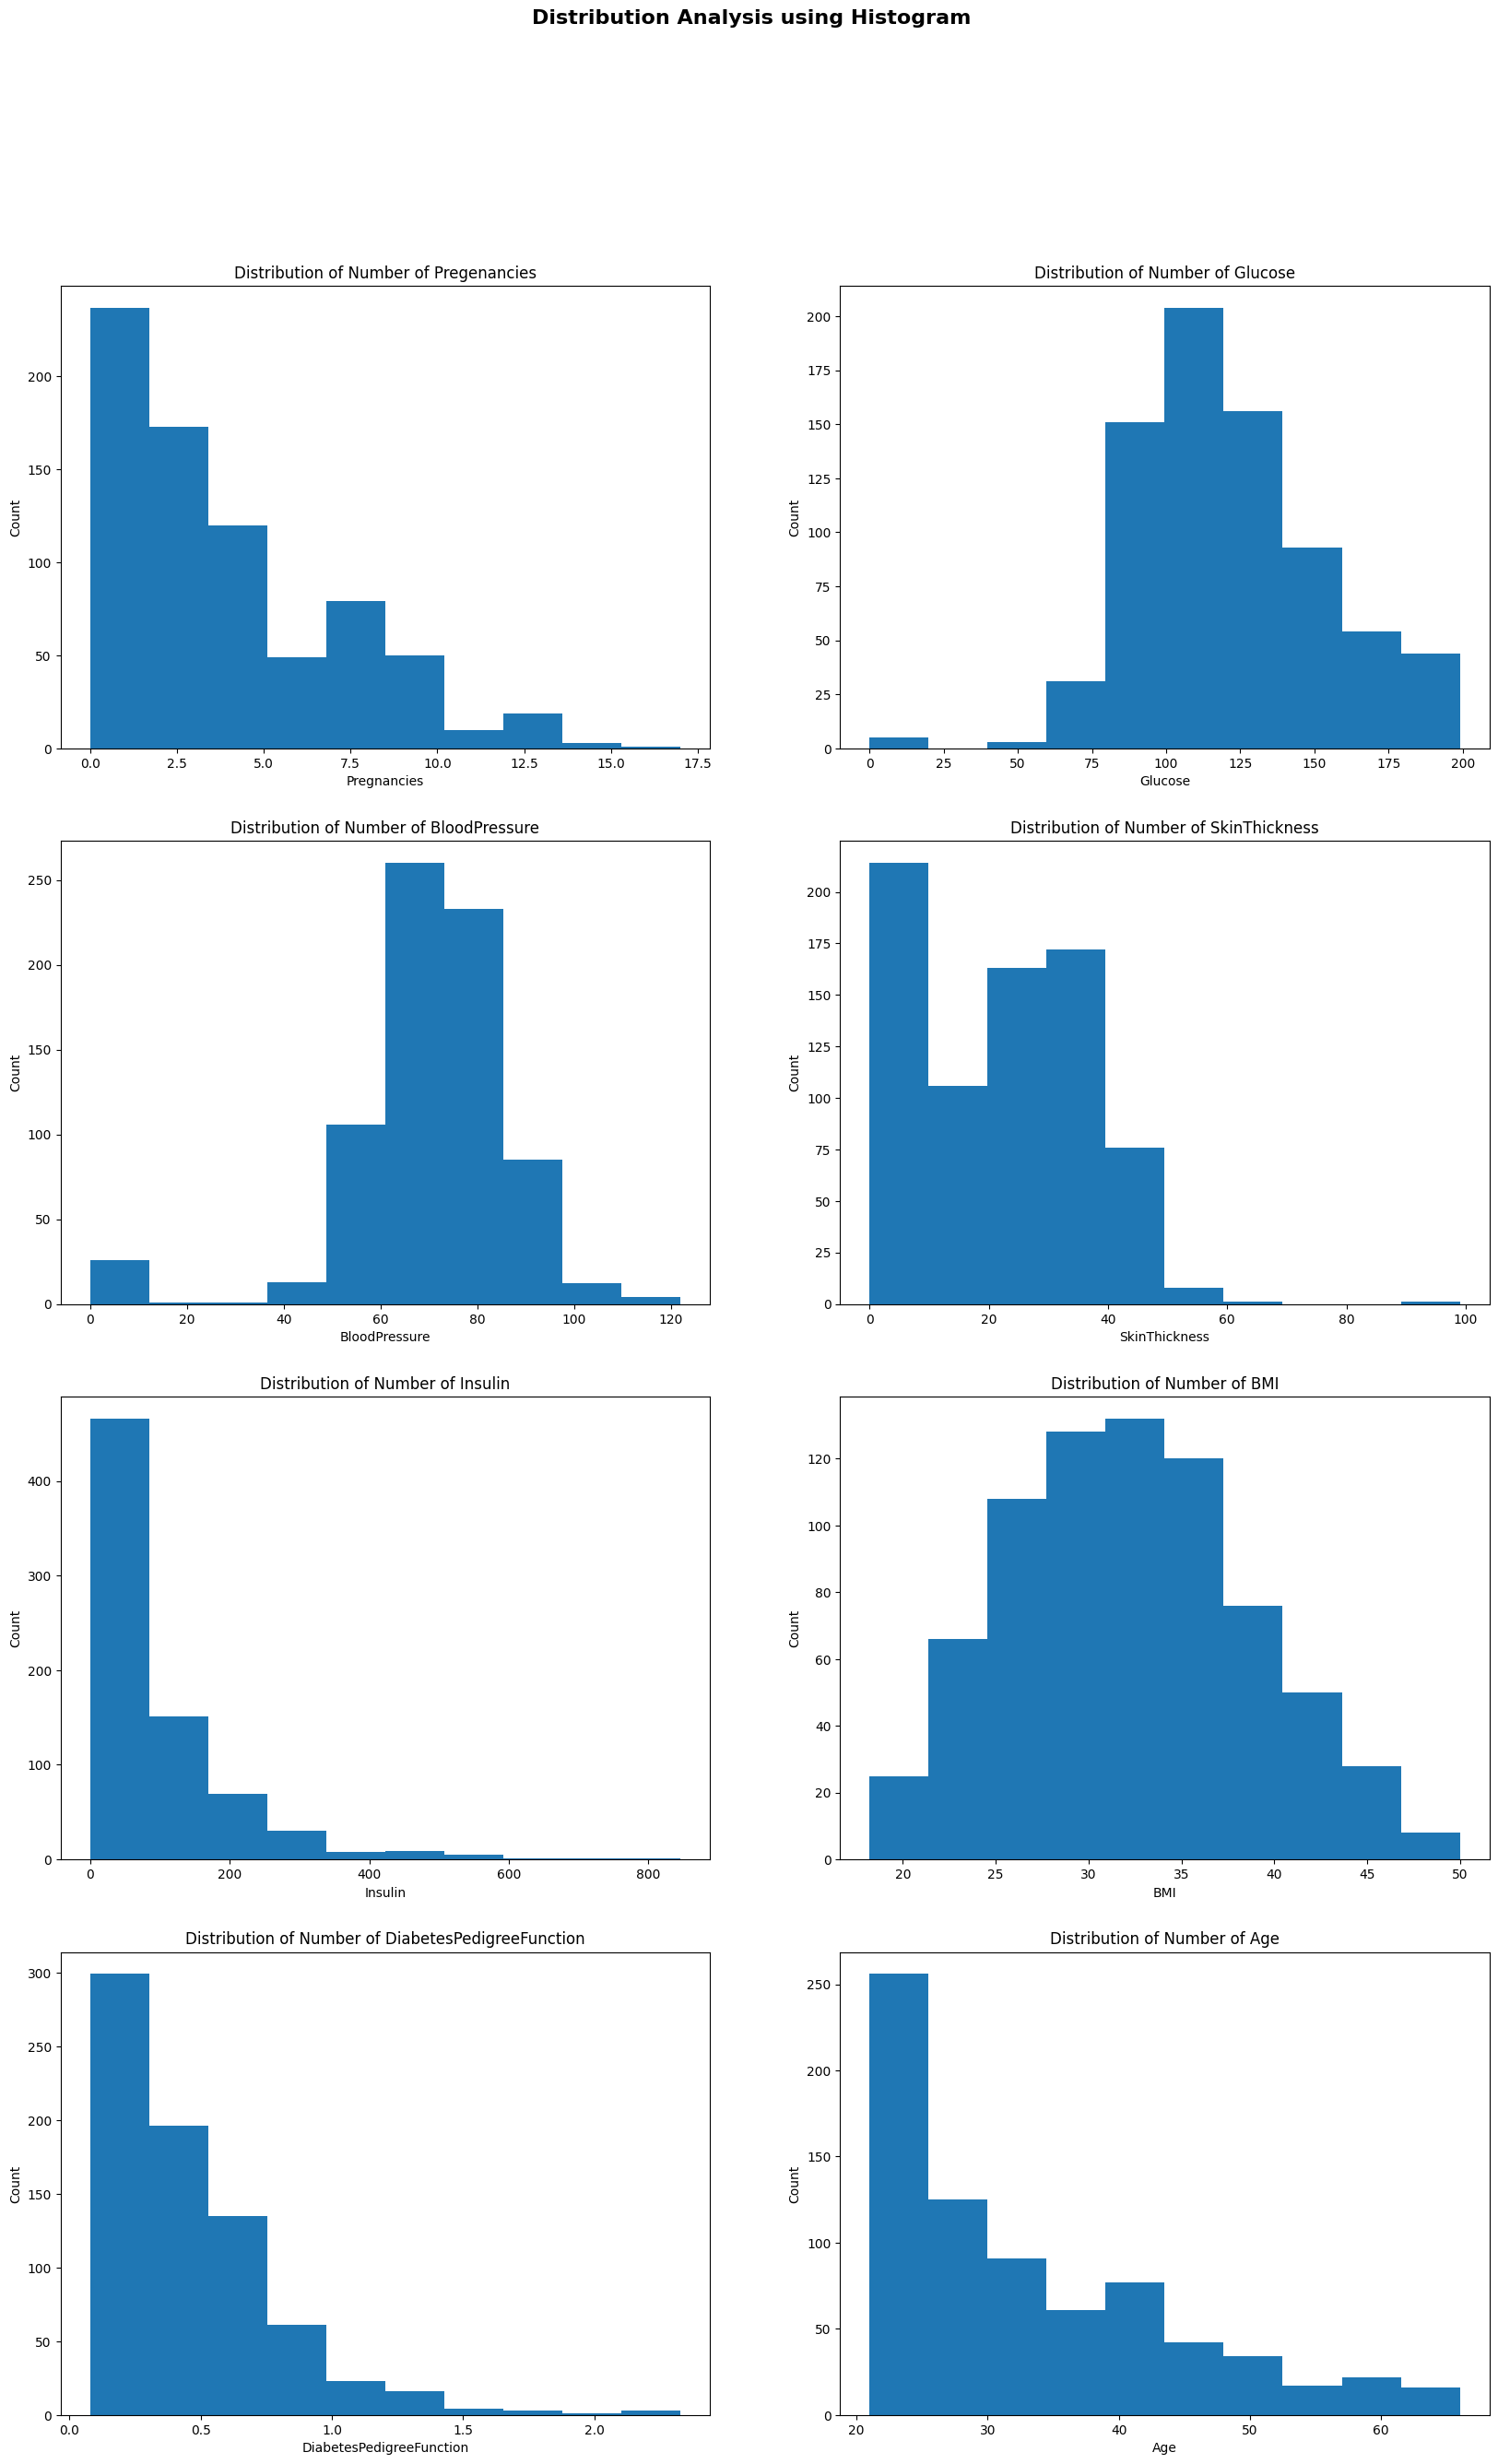

In [106]:
# Distribution Analysis using Histogram
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)
      ) = plt.subplots(nrows=4, ncols=2, figsize=(20, 30))
ax1.hist(df2['Pregnancies'])
ax2.hist(df2['Glucose'])
ax3.hist(df2['BloodPressure'])
ax4.hist(df2['SkinThickness'])
ax5.hist(df2['Insulin'])
ax6.hist(df2['BMI'])
ax7.hist(df2['DiabetesPedigreeFunction'])
ax8.hist(df2['Age'])
fig.suptitle("Distribution Analysis using Histogram",
             fontsize=16, fontweight='bold')
ax1.set(title="Distribution of Number of Pregenancies",
        xlabel="Pregnancies",
        ylabel="Count")
ax2.set(title="Distribution of Number of Glucose",
        xlabel="Glucose",
        ylabel="Count")
ax3.set(title="Distribution of Number of BloodPressure",
        xlabel="BloodPressure",
        ylabel="Count")
ax4.set(title="Distribution of Number of SkinThickness",
        xlabel="SkinThickness",
        ylabel="Count")
ax5.set(title="Distribution of Number of Insulin",
        xlabel="Insulin",
        ylabel="Count")
ax6.set(title="Distribution of Number of BMI",
        xlabel="BMI",
        ylabel="Count")
ax7.set(title="Distribution of Number of DiabetesPedigreeFunction",
        xlabel="DiabetesPedigreeFunction",
        ylabel="Count")
ax8.set(title="Distribution of Number of Age",
        xlabel="Age",
        ylabel="Count")


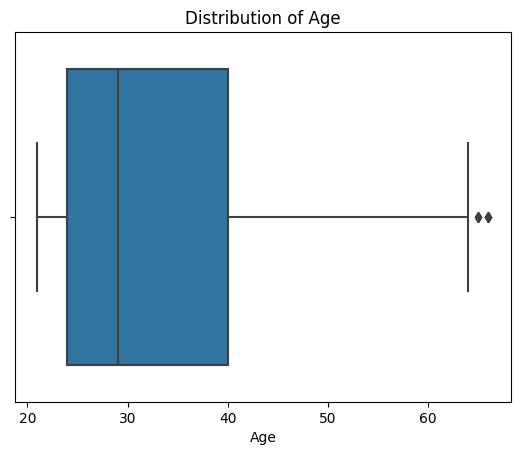

In [107]:
sns.boxplot(x='Age', data=df2)
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.show()


# Correlation Matrix

In [108]:
correlation = df2.corr()
correlation


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128941,0.168932,-0.063007,-0.062853,0.042328,-0.016410,0.566562,0.226279
Glucose,0.128941,1.000000,0.131438,0.041541,0.333602,0.218912,0.126438,0.274176,0.472049
BloodPressure,0.168932,0.131438,1.000000,0.176576,0.061858,0.191739,0.027521,0.262422,0.056054
SkinThickness,-0.063007,0.041541,0.176576,1.000000,0.434662,0.378667,0.164344,-0.087024,0.063597
Insulin,-0.062853,0.333602,0.061858,0.434662,1.000000,0.176373,0.196532,-0.017082,0.141345
BMI,0.042328,0.218912,0.191739,0.378667,0.176373,1.000000,0.137496,0.076306,0.300836
DiabetesPedigreeFunction,-0.016410,0.126438,0.027521,0.164344,0.196532,0.137496,1.000000,0.040302,0.179804
Age,0.566562,0.274176,0.262422,-0.087024,-0.017082,0.076306,0.040302,1.000000,0.264987
Outcome,0.226279,0.472049,0.056054,0.063597,0.141345,0.300836,0.179804,0.264987,1.000000


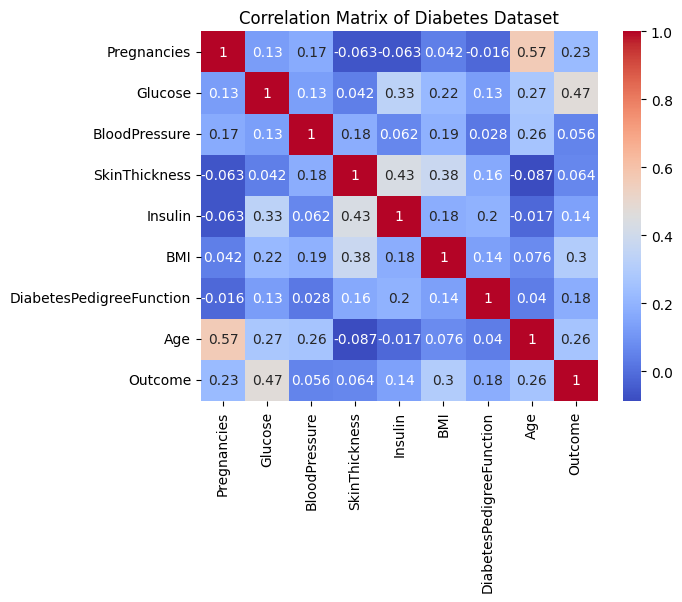

In [109]:
corr_matrix = df2.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Diabetes Dataset')
plt.show()


# Separating Dependent and Independent Columns

In [110]:
X = df2.drop(["SkinThickness", "Outcome"], axis=1)
y = df2["Outcome"]


In [111]:
X


,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,0,33.6,0.627,50
1,1,85,66,0,26.6,0.351,31
2,8,183,64,0,23.3,0.672,32
3,1,89,66,94,28.1,0.167,21
4,0,137,40,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63
764,2,122,70,0,36.8,0.340,27
765,5,121,72,112,26.2,0.245,30
766,1,126,60,0,30.1,0.349,47


In [112]:
y


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 741, dtype: int64

# Spliting Dataset into Training and Test Sets

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# Trying out Different Models and Checking the Accuracy Score

### Logistic Regression

In [114]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
clr = LogisticRegression(max_iter=500)
clr.fit(X_train, y_train)
preds = clr.predict(X_test)
accuracy = accuracy_score(preds, y_test)
accuracy


0.825503355704698

### Random Forest Classifier

In [115]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
preds = rfc.predict(X_test)
accuracy = accuracy_score(preds, y_test)
accuracy


0.7516778523489933

### Decision Tree Classifier

In [116]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
preds = dtc.predict(X_test)
accuracy = accuracy_score(preds, y_test)
accuracy


0.7114093959731543

### Gaussian Naive Bayes

In [119]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
preds = gnb.predict(X_test)
accuracy = accuracy_score(preds, y_test)
accuracy


0.7718120805369127